In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt
import platform

# 19 - Simultaneous Simulation JC and Rabi models

This is a tutorial for open system dynamics of JC.

In [2]:
# parameters for the Hamiltonian
qubitFreq = 1
cavityFreq = 1
couplingFreq = 0.25
cavityDim = 5

# parameters for the evolution
totalTime = 3*(np.pi/couplingFreq)
timeStep = 0.1

In [3]:
# Qubit for the JC model
QubitJC = qg.Qubit(frequency=qubitFreq)

# Cavity for the JC model
CavityJC = qg.Cavity(dimension=cavityDim, frequency=cavityFreq)

# JC model consists of a qubit and cavity
# and this is the 'free evolution' part of the JC-Hamiltonian
JCSystem = QubitJC + CavityJC

In [4]:
# Rabi model also consists of a qubit and cavity
RabiSystem = JCSystem.copy()

In [5]:
# create the JC coupling using built-in coupling extension
JCSystem.JC(couplingFreq)

RabiCoupling = RabiSystem.Rabi(couplingFreq)

In [6]:
# simulation contains the systems, protocol, and sweeps
simulation = qg.Simulation(subSys=[JCSystem, RabiSystem])

# simulation stores the evolution parameters
simulation.stepSize = timeStep
simulation.totalTime = totalTime

# initial state of the simulation
simulation.initialStateSystem = JCSystem
simulation.initialState = [1, 1]

freqSweep = simulation.Sweep.createSweep(
                    system=[CavityJC, "Cavity2"],
                    sweepKey="frequency",
                    sweepMax=qubitFreq+cavityFreq,
                    sweepMin=qubitFreq-cavityFreq,
                    sweepStep=.025)

In [7]:
compositeSZ = qg.compositeOp(qg.sigmaz(),   dimA=cavityDim)
# calculate the desired results and store
def compute(sim, args):
    stateJC = args[0]
    stateRabi = args[1]

    res = sim.qRes
    res.result = ['zRabi', qg.expectation(compositeSZ, stateRabi)]
    res.result = ['zJC', qg.expectation(compositeSZ, stateJC)]

    res.result = ['fidJC', qg.fidelityPure(stateRabi, stateJC)]

simulation.compute = compute

<span style="color:red" font-weight="bold"> IMPORTANT NOT FOR WINDOWS USERS : MULTI-PROCESSING (p=True) DOES NOT WORK WITH NOTEBOOK

You can use a python script, but you will need to make sure that the critical parts of the code are under ``` if __name__ == "__main__": ``` We are going to add further tutorials for this later.

In [8]:
# do not store the states
simulation.delStates = True

# run the simulation
# p=True uses multi-processing for the sweep
simulation.run(p=(platform.system() != 'Windows'))

[]

Text(0, 0.5, 'Time')

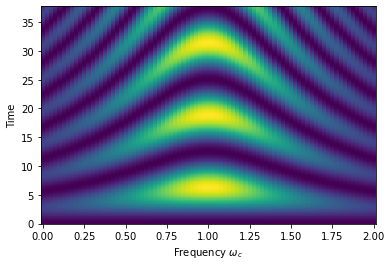

In [9]:
Y, X = np.meshgrid(simulation.timeList, freqSweep.sweepList)

plt.pcolormesh(X, Y, simulation.results['zJC'])

plt.xlabel("Frequency $\omega_{c}$")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

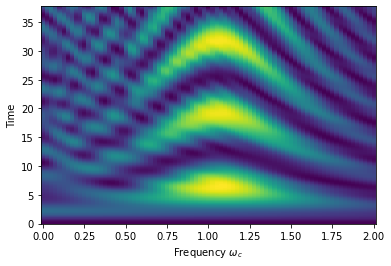

In [10]:
Y, X = np.meshgrid(simulation.timeList, freqSweep.sweepList)

plt.pcolormesh(X, Y, simulation.results['zRabi'])

plt.xlabel("Frequency $\omega_{c}$")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

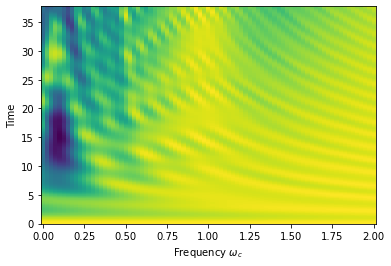

In [11]:
Y, X = np.meshgrid(simulation.timeList, freqSweep.sweepList)

plt.pcolormesh(X, Y, simulation.results['fidJC'])

plt.xlabel("Frequency $\omega_{c}$")
plt.ylabel("Time")